In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## `pandas` settings
Make it so that we can see long lists, because we have a lot of potential features.

In [2]:
pd.options.display.max_seq_items = 2000 # default is 100
pd.options.display.max_columns = 250 # default is 20
pd.options.display.max_rows = 250 # default is 20

# Building the random forest model

## Read in training set

We built this dataset in the last notebook, so we just need to read in both the X and Y dataframes.

In [3]:
X = pd.read_csv('processed/x_rf_training.csv', index_col=0)
X.head()

,HOV_LANES,S_WID_I,LOAD_TAND,NUM_LANES,SPD_MIN,BRDG_STRUC,LANE_WIDTH,LOAD_GROSS,SURF_TRE_1,MED_WID,HP_MED_W,ROW_MIN,ACCEL_DECE,SUR_W,SEC_BIC,ROW_W_USL,RB_WID,S_WID_O,SPD_MAX,LOAD_AXLE,S_USE_I_0,S_USE_I_1,S_USE_I_2,S_USE_I_3,S_USE_I_4,S_USE_I_5,S_USE_I_6,S_USE_I_7,HWY_STAT_0,HWY_STAT_6,S_TYPE_I_0,S_TYPE_I_1,S_TYPE_I_2,S_TYPE_I_3,S_TYPE_I_4,S_TYPE_I_5,S_TYPE_I_99,SURF_TREAT_0,SURF_TREAT_1,SURF_TREAT_2,SURF_TREAT_4,SURF_TREAT_5,SURF_TREAT_7,SURF_TREAT_8,SURF_TREAT_9,MED_TYPE_0,MED_TYPE_2,MED_TYPE_3,MED_TYPE_4,MED_TYPE_5,MED_TYPE_6,MED_TYPE_7,MED_TYPE_99,S_USE_O_0,S_USE_O_1,S_USE_O_2,S_USE_O_3,S_USE_O_4,S_USE_O_5,S_USE_O_6,S_USE_O_7,HWY_DES1_0,HWY_DES1_1,HWY_DES1_2,HWY_DES1_3,HWY_DES1_4,HWY_DES1_5,HOV_TYP_0,HOV_TYP_1,SRF_TYPE_0,SRF_TYPE_1,SRF_TYPE_2,SRF_TYPE_3,SRF_TYPE_4,SRF_TYPE_5,SRF_TYPE_6,SRF_TYPE_7,SRF_TYPE_9,SRF_TYPE_10,SRF_TYPE_11,SRF_TYPE_13,CLMB_PS_LA_0.0,CLMB_PS_LA_1.0,CLMB_PS_LA_2.0,CLMB_PS_LA_3.0,DIR_TRAV_0,DIR_TRAV_1,DIR_TRAV_3,DIR_TRAV_4,ACES_CTRL_0,ACES_CTRL_1,ACES_CTRL_2,ACES_CTRL_3,CURB_R_0,CURB_R_1,CURB_R_2,CURB_R_3,CURB_R_4,CURB_R_5,CURB_L_0,CURB_L_1,CURB_L_2,CURB_L_3,CURB_L_4,CURB_L_5,BASE_TP_0,BASE_TP_1,BASE_TP_3,BASE_TP_4,BASE_TP_5,BASE_TP_6,BASE_TP_7,BASE_TP_9,BASE_TP_10,BASE_TP_11,BASE_TP_14,S_TYPE_O_0,S_TYPE_O_1,S_TYPE_O_2,S_TYPE_O_3,S_TYPE_O_4,S_TYPE_O_5,S_TYPE_O_99
FID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1,0,2,0,False,10,0,0.0,0,1,80,0,20,0,80,22,1,60,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0.0,1,0,2,0,True,10,0,0.0,0,1,80,0,20,0,80,22,1,60,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0.0,6,0,2,0,False,12,58420,0.0,0,6,100,0,24,0,100,36,6,55,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.0,8,0,2,0,False,12,0,0.0,0,8,100,0,24,0,100,40,8,60,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5,0.0,4,0,2,0,False,12,58420,0.0,0,4,70,0,18,0,70,32,10,30,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [4]:
Y = pd.read_csv('processed/y_crash_training.csv', index_col=0)
Y.head()

,0
FID,
0,0.000000
1,0.000000
3,0.000000
4,0.000000
5,0.000027


In [5]:
X.shape

(140890, 123)

Looks like we have about 140,000 points of training data and 120 features to work with.

## Find best model

In [6]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt']
max_depth = np.linspace(10, 101, 10)
min_samples_split = [2, 10, 100]
min_samples_leaf = [1, 2, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [7]:
rf = RandomForestRegressor()
# search 1000 different combos using 5-fold cross validation using all available cores
rfs = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=500, cv=3, verbose=2, random_state=42, n_jobs=-1)
rfs.fit(X, Y)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed: 31.0min
/home/carlin/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed: 64.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 67.6min finished
/home/carlin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=500, n_jobs=-1,
          param_distributions={'n_estimators': [100, 109, 118, 127, 136, 145, 154, 163, 172, 181, 190, 200, 209, 218, 227, 236, 245, 254, 263, 272, 281, 290, 300, 309, 318, 327, 336, 345, 354, 363, 372, 381, 390, 400, 409, 418, 427, 436, 445, 454, 463, 472, 481, 490, 500, 509, 518, 527, 536, 545, 554, 563, 57...  ]), 'min_samples_split': [2, 10, 100], 'min_samples_leaf': [1, 2, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, re

In [8]:
rfs.best_params_

{'n_estimators': 663,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60.55555555555556,
 'bootstrap': False}

## Evaluate on test set

### Read in test set

In [81]:
Xtest = pd.read_csv('processed/x_rf_test.csv', index_col=0)
Ytest = pd.read_csv('processed/y_crash_test.csv', index_col=0)['0']

### Evaluate best random forest model on test set

In [113]:
Ypred = pd.DataFrame(data=rfs.best_estimator_.predict(Xtest), index=Xtest.index)[0]
error = Ypred - Ytest
print('                        RMSE:', np.mean(error**2))
print('             Crashes/VMT off:', error.sum())
print('Crashes/VMT off cumulatively:', error.abs().sum())

                        RMSE: 2.1146486471759145e-08
             Crashes/VMT off: -0.017546392224787936
Crashes/VMT off cumulatively: 0.1785561000556794


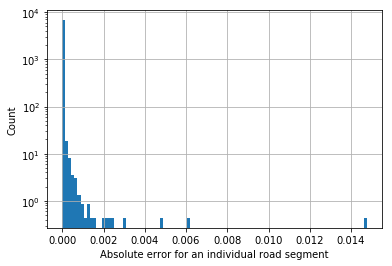

In [89]:
plt.hist(np.abs(error), bins=100, log=True, density=True)
plt.xlabel('Absolute error for an individual road segment')
plt.ylabel('Count')
plt.grid()
plt.show()

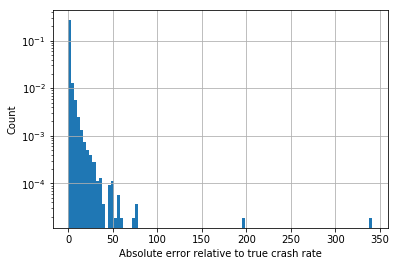

In [107]:
relerr = np.abs(error)/Ytest
relerr[relerr==np.inf] = 0
relerr[relerr==np.nan] = 0
plt.hist(relerr, bins=100, density=True, log=True)
plt.xlabel('Absolute error relative to true crash rate')
plt.ylabel('Count')
plt.grid()
plt.show()

### Check outlier

We have one road segment where our crash rate predicition is way off from the true crash rate. Why is that?

In [108]:
relerr.max(skipna=True)

341.7984740141622

In [110]:
i = relerr.idxmax(skipna=True)
Ytest[i]

1.8740466987981037e-08

In [111]:
Ypred[i]

6.424203485792682e-06

Turns out it's because both the true crash rate is very small, skewing the division.

## Measuring feature importance

We measure the relative importance of our features by how often decision trees in our random forest split based on the value in that column.

In [119]:
dfimp = pd.DataFrame({
    'Importance': rf_random.best_estimator_.feature_importances_,
    'Features': X.columns
}).set_index('Features')
dfimp = dfimp.sort_values('Importance', ascending=False)
dfimp.head()

,Importance
Features,
SPD_MAX,0.212304
S_WID_O,0.156033
S_WID_I,0.148941
RB_WID,0.148054
HP_MED_W,0.134756


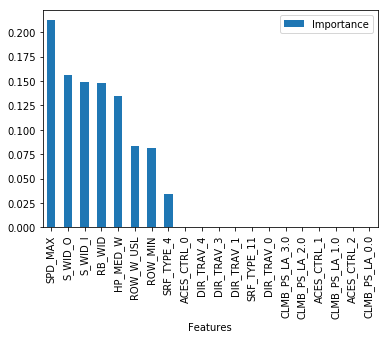

In [120]:
dfimp[:20].plot(kind='bar')
plt.show()

In [123]:
dfimp[:8].sum()

Importance    1.0
dtype: float64

Turns out only 8 features are revelant (at least to this model):
1. `SPD_MAX`, speed limit
2. `S_WID_O`, the outside shoulder width
3. `S_WID_I`, the inside shoulder width
4. `RB_WID`, roadbed width (including shoulder and surface widths)
5. `HP_MED_W`, median width (and both inside shoulders)
6. `ROW_W_USL`, the usual right-of-way width
7. `ROW_MIN`, the minimum right-of-way width
8. `SRF_TYPE_4`, whether or not the surface is made of thick asphaltic concrete